#### Short notebook to obtain a plot of the distribution of the different classes

Imports and loads

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [13]:
drugs = pd.read_csv(os.path.join('..', 'data', '03_primary', 'all_drugs_dataset.csv'))

In [14]:
drugs.columns

Index(['CID', 'HBondAcceptorCount', 'HBondDonorCount', 'IsomericSMILES',
       'MolecularWeight', 'LogP', 'RuleFive', 'MATC_Code_Short',
       'MATC_Code_Explanation'],
      dtype='object')

Obtaining the distribution of classes

In [15]:
drugs_cats_sort = drugs.groupby('MATC_Code_Explanation').count().sort_values('MATC_Code_Short', ascending=False)['MATC_Code_Short']

In [16]:
drugs_cats_sort

MATC_Code_Explanation
Antiinfectives for systemic use                                       2552
Nervous system                                                        1475
Antineoplastic and immunomodulating agents                            1414
Cardiovascular system                                                 1047
Alimentary tract and metabolism                                        753
Blood and blood forming organs                                         425
Dermatologicals                                                        346
Respiratory system                                                     317
Genito urinary system and sex hormones                                 305
Various                                                                288
Antiinflammatory                                                       277
Musculo-skeletal system                                                174
Sensory organs                                                         152
Lip

Shortening the class explanation so they fit better on a figure

In [17]:
short_xticks = []
for xtick in drugs_cats_sort.index:
    short_xticks.append(xtick.split()[0])

In [18]:
short_xticks

['Antiinfectives',
 'Nervous',
 'Antineoplastic',
 'Cardiovascular',
 'Alimentary',
 'Blood',
 'Dermatologicals',
 'Respiratory',
 'Genito',
 'Various',
 'Antiinflammatory',
 'Musculo-skeletal',
 'Sensory',
 'Lipid',
 'Antiparasitic',
 'Systemic']

Plotting the graph

c:\Users\josin\anaconda3\envs\kedro-rebuild\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

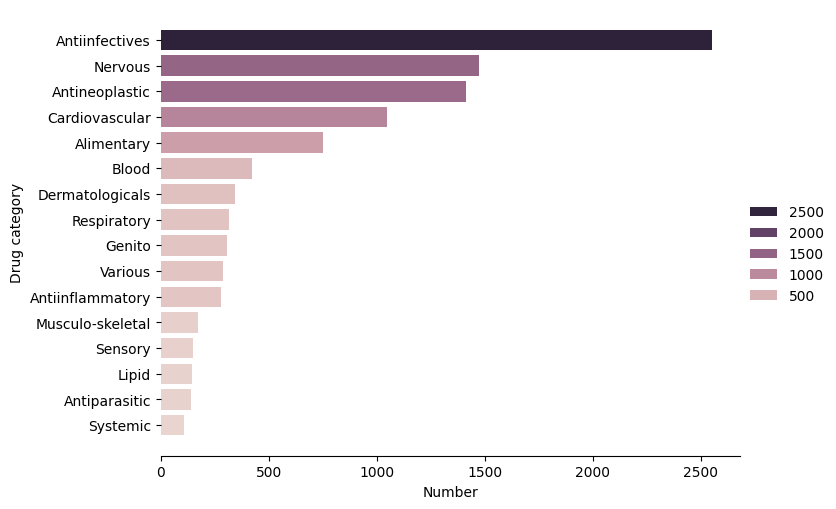

In [19]:
g = sns.catplot(y=short_xticks, x=drugs_cats_sort.values, hue=drugs_cats_sort.values, kind='bar', legend=True, aspect=1.5)
sns.move_legend(g, reverse=True, loc='center right')
g.despine(left=True)
g.set_xlabels('Number')
g.set_ylabels('Drug category')
plt.plot()